<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/2507_korea_ransac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RANSAC - .........
# outlier를 제외하고 inlier만 활용하여 모델 피팅
# 이상치제거

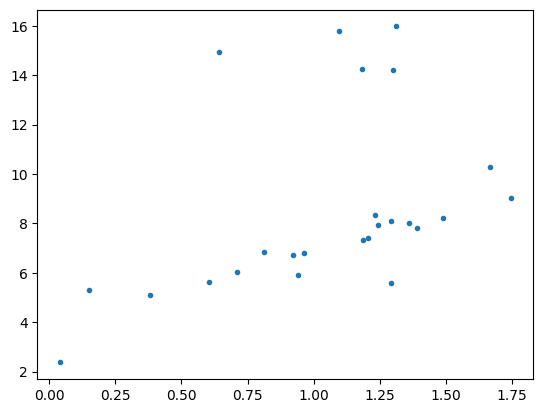

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 20
x = np.random.rand(m, 1) * 2
y = x * 3 + 4 + np.random.randn(m, 1)

xn = np.random.randn(5, 1) * 0.3 + 1
yn = np.random.randn(5, 1) + 15

x = np.r_[x, xn]
y = np.r_[y, yn]


plt.plot(x, y, '.')

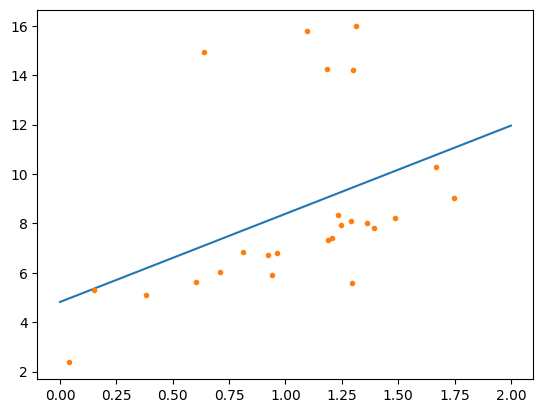

In [ ]:
xb = np.c_[x, x**0]
theta, _, _, _ = np.linalg.lstsq(xb, y)

tx = np.array([[0], [2]])
ty = np.c_[tx, tx**0] @ theta
plt.plot(tx, ty)
plt.plot(x, y, '.')

In [ ]:
max_count = 0
max_t = None
max_i = None
for _ in range(100):
    # 두 개의 점을 랜덤으로 고른다.
    ri = np.random.permutation(len(x))[:2] #ex) [3, 12]
    xs = x[ri] #(2, 1)
    ys = y[ri] #(2, 1)
    # 랜덤으로 고른 점으로 모델 추정
    t, _, _, _ = np.linalg.lstsq(np.c_[xs, xs**0], ys)
    a, b = t
    # 모델 t와 모든 점들 사이의 거리 측정 -> d
    yh = a * x + b #y-hat
    #yh = np_c[x, x**0] @ t
    d = np.abs(yh - y)

    # 거리가 3미만인 것들 count.
    count = np.sum(d < 3)
    # count가 최대일 때 선택된 샘플을 저장.
    if count > max_count:
        max_t = t
        max_count = count
        max_i = d < 3 # 선택된 샘플.
max_t, max_count

(array([[2.71699949],
        [4.19531404]]),
 np.int64(20))

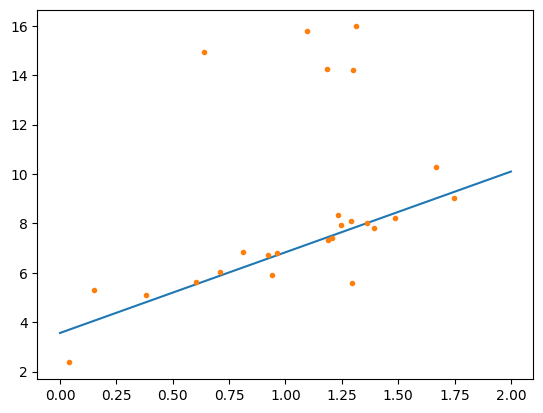

In [ ]:
# 최종 모델 추정
mx = x[max_i]
my = y[max_i]
theta, _, _, _ = np.linalg.lstsq(np.c_[mx, mx**0], my)
theta
tx = np.array([[0], [2]])
ty = np.c_[tx, tx**0] @ theta
plt.plot(tx, ty)
plt.plot(x, y, '.')